# Files and imports

In [12]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np


#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_msg_pre_proc.csv'

file_tag = 'df_msg_pre_proc'

data = pd.read_csv(filepath)

In [13]:
%run 'scripts/dslabs_functions.py'

dslabs lodaded


# Variable Encoding

## Ordinal Encoding


### Binary

In [14]:
from pandas import read_csv, DataFrame
#from dslabs_functions import get_variable_types, encode_cyclic_variables, dummify

data: DataFrame = read_csv(filepath)
vars: dict[str, list] = get_variable_types(data)

true_false: dict[str, int] = {"false": 0, "False": 0, "f": 0, False: 0, "true": 1, "True": 1, "t": 1, True: 1}
#channel_msg_values: dict[str, int] = {"mobile_push": 0, "email": 1}
time_of_day_values: dict[str, int] = {"Morning": 0, "Afternoon": 1}

encoding: dict[str, dict[str, int]] = {
    #"is_opened": true_false,
    "is_clicked": true_false,
    #"is_unsubscribed": true_false,
    #"is_hard_bounced": true_false,
    #"is_soft_bounced": true_false,
    #"is_complained": true_false,
    #"is_blocked": true_false,  # Added
    #"is_purchased": true_false,
    "subject_with_personalization": true_false,
    "subject_with_deadline": true_false,
    "subject_with_emoji": true_false,
    "subject_with_bonuses": true_false,
    "subject_with_discount": true_false,
    "subject_with_saleout": true_false,
    "is_weekend": true_false,  # Added
    "time_of_day": time_of_day_values  # Added
 #   "channel_msg": channel_msg_values  # Added
}
data_enc: DataFrame = data.replace(encoding, inplace=False)
data_enc.head()

,platform,email_provider,sent_at,is_clicked,campaign_type,channel_cmp,topic,total_count,subject_length,subject_with_personalization,...,subject_with_saleout,day_of_year,week_of_month,is_weekend,day_of_week_nr,day_of_month,month,hour,min,time_of_day
0,NaN,yandex.ru,2021-04-30 00:24:18+00:00,0,transactional,email,order created,NaN,74.0,0.0,...,0.0,120,5,0,4,30,April,0,24,Night
1,NaN,mail.ru,2021-04-30 00:30:28+00:00,0,transactional,email,order created,NaN,74.0,0.0,...,0.0,120,5,0,4,30,April,0,30,Night
2,NaN,mail.ru,2021-04-30 01:11:21+00:00,0,transactional,email,order created,NaN,74.0,0.0,...,0.0,120,5,0,4,30,April,1,11,Night
3,NaN,mail.ru,2021-04-30 01:11:21+00:00,0,transactional,email,order created,NaN,74.0,0.0,...,0.0,120,5,0,4,30,April,1,11,Night
4,NaN,gmail.com,2021-04-30 01:17:37+00:00,0,transactional,email,order ready for pickup,NaN,88.0,0.0,...,0.0,120,5,0,4,30,April,1,17,Night


### Symbolic

In [15]:
for v in vars["symbolic"]:
    print(v, data_enc[v].unique())

platform [nan 'desktop' 'smartphone' 'phablet' 'tablet']
email_provider ['yandex.ru' 'mail.ru' 'gmail.com' 'list.ru' 'inbox.ru' 'bk.ru'
 'rambler.ru' 'ya.ru' 'private' 'icloud.com' 'yopmail.com' 'bigmir.net'
 'yangex.ru' 'internet.ru' 'sibmail.com' 'mail.com' 'yandex.ua' 'ngs.ru'
 'dc2b.ru' 'com.ru' 'yahoo.com' 'outlook.com' 'ro.ru' 'cdek.ru' 'live.ru'
 'narod.ru' 'hotmail.com' 'mail.ua' 'lenta.ru' nan 'yandeks.ru' 'e1.ru'
 'udm.ru' 'ukr.net' 'pnu.edu.ru' 'nxt.ru' 'mail2000.ru' 'live.com'
 't-sk.ru' 'omgau.org' 'chel.ru' '63.ru' 'mtsretail.ru' '74.ru' 'qip.ru'
 'ufanet.ru' 'yanfex.ru' 'ufamts.ru' 'me.com' 'russianpost.ru'
 'yandex.com' 'my.com' 'rencons.com' 'myrambler.ru' 'gmail.com.com'
 'icoud.com' 'mts.ru' 'li.ru' 'eist.ru' 'nextmail.ru' 'e-izhevsk.ru'
 'tn.ru' 'ymail.com' 'dom.raid.ru' 'rtural.ru' 'list.com' 'xaker.ru'
 'land.ru' 'iclaud.com' 'gmai.com' 'hotbox.ru' 'yandex.by' 'rkmail.ru'
 'chelny.com' 'citydom.ru' 'iclud.com' 'inbox.lv' 'edu.tatar.ru' '2074.ru'
 'spaces.ru' 'vtom

In [16]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

variable_types: dict[str, list] = get_variable_types(data_enc)

# Calculate the number of distinct values for each column
distinct_counts = {var_type: {col: data[col].nunique() for col in cols} for var_type, cols in variable_types.items()}

# Print the results
for var_type, counts in distinct_counts.items():
    print(f"{var_type.capitalize()} Variables:")
    for col, count in counts.items():
        print(f"  {col}: {count} distinct values")
    print()

Numeric Variables:
  total_count: 38 distinct values
  subject_length: 30 distinct values
  day_of_year: 46 distinct values
  week_of_month: 5 distinct values
  day_of_week_nr: 7 distinct values
  day_of_month: 31 distinct values
  hour: 24 distinct values
  min: 60 distinct values

Binary Variables:
  is_clicked: 2 distinct values
  subject_with_personalization: 2 distinct values
  subject_with_deadline: 2 distinct values
  subject_with_emoji: 2 distinct values
  subject_with_bonuses: 2 distinct values
  subject_with_discount: 2 distinct values
  subject_with_saleout: 2 distinct values
  is_weekend: 2 distinct values

Date Variables:
  sent_at: 681942 distinct values

Symbolic Variables:
  platform: 4 distinct values
  email_provider: 198 distinct values
  campaign_type: 3 distinct values
  channel_cmp: 3 distinct values
  topic: 18 distinct values
  month: 3 distinct values
  time_of_day: 4 distinct values



## Logic

- campaign_type ['bulk' 'transactional' 'trigger']
    - transactional e trigger, pela sua definiçao, estao mais relacionados uns com os outros. o trigger e o bulk tem de estar mais afastados, ou entao transactional e bulk tem de estar afastados. 

- platform [nan 'phablet' 'smartphone' 'desktop' 'tablet']
    - according to their size and similarities/functionalities

- email_provider: Based on the perceived importance, similarity, and usage in Russia. This ranking considers the popularity and common usage of these email providers in Russia: The more well-known and commonly used providers receive lower values, while less common or less significant ones receive higher values.
    - Top Russian Providers (High Importance)
    - International Providers (Moderate Importance)
    - Other Russian Providers (Moderate to Low Importance)
    - Less Known or Incorrect Entries (Low Importance)
    - Generic or Non-Email Providers (Lowest Importance)

- channel_cmp ['mobile_push' 'email' 'multichannel']
    - In the context of a Russian e-commerce multichannel platform, we need to consider the effectiveness and common usage of each channel for sending campaigns and messages to clients. Here's a suggested ranking based on typical engagement and reach:

    - Multichannel: This involves using multiple channels to reach clients, which can increase engagement and effectiveness by combining the strengths of various channels.

    - Email: Email is a widely used and effective channel for detailed communication and marketing campaigns. It is commonly used in Russia for e-commerce communications.

    - Mobile Push: Mobile push notifications are effective for immediate and short notifications but may have lower engagement compared to email and multichannel approaches. However, they are still quite popular for quick updates and alerts.
- topic ['sale out' 'order created' 'profile updated' 'abandoned category'
 'added to wish list' 'order ready for pickup' 'subscribed'
 'abandoned cart' 'recent purchase' 'abandoned view' nan 'bonuses expired'
 'order cancelled' 'abandoned search' 'event']
    - based on their potential importance in the custmoer journey on a website, and also on common e-commerce and user interaction scenarios
    - Order-related topics: These are directly related to transactions and are typically of high importance.
        - order created
        - order ready for pickup
        - order cancelled
        - recent purchase
    - Abandoned actions: These indicate potential lost sales or user interest.
        - abandoned cart
        - abandoned category
        - abandoned view
        - abandoned search
    - User engagement: These involve user interactions and updates.
        - profile updated
        - added to wish list
        - subscribed
    - Promotional and informational: These are related to promotions and notifications.
        - price drop
        - sale out
        - bonuses expired
        - event
- month ['April' 'May' 'June']
    - 0, 1, 2

In [17]:
campaign_type_values: dict[str, int] = {
    "bulk": 0, 
    "transactional": 1, 
    "trigger": 2
}
platform_values: dict[str, int] = {
    "smartphone": 0,
    "phablet": 1,
    "tablet": 2,
    "desktop": 3,
}
month_values: dict[str, int] = {
    "April": 0,
    "May": 1,
    "June": 2,
}
channel_values: dict[str, int] = {
    'multichannel': 0,
    'email': 1,
    'mobile_push': 2
}
topic_values: dict[str, int] = {
    "order created": 0,
    "order ready for pickup": 1,
    "order shipped": 2,
    "recent purchase": 3,
    "order pickup still pending": 4,
    "order cancelled": 5,
    "order reminder": 6,
    "abandoned cart": 7,
    "abandoned view": 8,
    "abandoned category": 9,
    "abandoned search": 10,
    "profile updated": 11,
    "subscribed": 12,
    "added to wish list": 13,
    "price drop": 14,
    "sale out": 15,
    "bonuses expired": 16,
    "event": 17
}

email_provider_values: dict[str, int] = {
    'yandex.ru': 0, 'mail.ru': 1, 'gmail.com': 2, 'list.ru': 3, 'inbox.ru': 4, 
    'bk.ru': 5, 'rambler.ru': 6, 'ya.ru': 7, 'private': 8, 'icloud.com': 9, 
    'yopmail.com': 10, 'bigmir.net': 11, 'yangex.ru': 12, 'internet.ru': 13, 
    'sibmail.com': 14, 'mail.com': 15, 'yandex.ua': 16, 'ngs.ru': 17, 'dc2b.ru': 18, 
    'com.ru': 19, 'yahoo.com': 20, 'outlook.com': 21, 'ro.ru': 22, 'cdek.ru': 23, 
    'live.ru': 24, 'narod.ru': 25, 'hotmail.com': 26, 'mail.ua': 27, 'lenta.ru': 28, 
    'yandeks.ru': 29, 'e1.ru': 30, 'udm.ru': 31, 'ukr.net': 32, 'pnu.edu.ru': 33, 
    'nxt.ru': 34, 'mail2000.ru': 35, 'live.com': 36, 't-sk.ru': 37, 'omgau.org': 38, 
    'chel.ru': 39, '63.ru': 40, 'mtsretail.ru': 41, '74.ru': 42, 'qip.ru': 43, 
    'ufanet.ru': 44, 'yanfex.ru': 45, 'ufamts.ru': 46, 'me.com': 47, 'russianpost.ru': 48, 
    'yandex.com': 49, 'my.com': 50, 'rencons.com': 51, 'myrambler.ru': 52, 
    'gmail.com.com': 53, 'icoud.com': 54, 'mts.ru': 55, 'li.ru': 56, 'eist.ru': 57, 
    'nextmail.ru': 58, 'e-izhevsk.ru': 59, 'tn.ru': 60, 'ymail.com': 61, 
    'dom.raid.ru': 62, 'rtural.ru': 63, 'list.com': 64, 'xaker.ru': 65, 'land.ru': 66, 
    'iclaud.com': 67, 'gmai.com': 68, 'hotbox.ru': 69, 'yandex.by': 70, 'rkmail.ru': 71, 
    'chelny.com': 72, 'citydom.ru': 73, 'iclud.com': 74, 'inbox.lv': 75, 
    'edu.tatar.ru': 76, '2074.ru': 77, 'spaces.ru': 78, 'vtomske.ru': 79, 
    '59.ru': 80, '72.ru': 81, 'olympus.ru': 82, 'i.ua': 83, 'maui.ru': 84, 
    'k66.ru': 85, '66.ru': 86, 'aaanet.ru': 87, 'nm.ru': 88, 'gmajl.com': 89, 
    'sochi.com': 90, 'uralweb.ru': 91, 'tut.by': 92, 'pochtabank.ru': 93, 
    'bi.ru': 94, 'protonmail.com': 95, 'googlemail.com': 96, 'yandex.kz': 97, 
    'auchan.ru': 98, 'bsu.edu.ru': 99, 'jmail.ru': 100, 'icioud.com': 101, 
    'jilfond.ru': 102, 'icloub.com': 103, 'tpu.ru': 104, 'km.ru': 105, 
    'tatar.ru': 106, 'iclound.com': 107, 'ua.ru': 108, 'orsk.ru': 109, 
    'xakep.ru': 110, '211.ru': 111, 's7.ru': 112, 'sampo.ru': 113, 'dmail.com': 114, 
    'pepsico.com': 115, 'sollers-auto.com': 116, 'aol.com': 117, 'gmael.com': 118, 
    'autorambler.ru': 119, 'hotmail.ru': 120, 'gmaol.com': 121, 'paso.ru': 122, 
    'spark-mail.ru': 123, 'phkp.ru': 124, 'sbor.net': 125, 'rarus.ru': 126, 
    'aport.ru': 127, 'mvd.ru': 128, 'urfu.ru': 129, 'meta.ua': 130, 'email.ru': 131, 
    'mai.com': 132, '9mail.com': 133, 'inox.ru': 134, 'ormamail.ru': 135, 
    'sberbank.ru': 136, 'mmk.ru': 137, 'eml.ru': 138, 'yandek.ru': 139, 
    'ramble.ru': 140, 'nlstar.com': 141, '29.ru': 142, '76.ru': 143, 'cn.ru': 144, 
    'ieloud.com': 145, 'qq.com': 146, 'sfedu.ru': 147, 'onego.ru': 148, 
    'naver.com': 149, 'udm.net': 150, 'myttk.ru': 151, 'vplicei.info': 152, 
    'maik.ru': 153, 'ozon.ru': 154, 'icloid.com': 155, 'shadrinsk.net': 156, 
    '45.ru': 157, 'goon.ru': 158, 'ivloud.com': 159, 'suek.ru': 160, 'zmail.ru': 161, 
    'rambler.ua': 162, 'yahoo.co.uk': 163, 'spartak.ru': 164, 'yndex.ru': 165, 
    'phystech.edu': 166, 'handed.ru': 167, 'istu.edu': 168, 'tl-istu.com': 169, 
    'rocketmail.com': 170, 'yandex.eu': 171, 'is74.ru': 172, 'samaradom.ru': 173, 
    'yahoo.fr': 174, 'gip.ru': 175, 'tgl.ru': 176, 'tyt.by': 177, 'front.ru': 178, 
    'sura.ru': 179, 'dns-shop.ru': 180, 'online.ua': 181, 'ua.fm': 182, 'nmgk.ru': 183, 
    'bmail.ru': 184, 'rdtc.ru': 185, 'cspu.ru': 186, 'kmtn.ru': 187, 'kamaz.ru': 188, 
    'sibnet.ru': 189, 'gmx.de': 190, 'gmil.com': 191, 'rumbler.ru': 192, 'bmail.com': 193, 
    'pochta.ru': 194, 'notmail.com': 195, 'govirk.ru': 196, 'mailto.plus': 197

}

encoding: dict[str, dict[str, int]] = {
    "campaign_type": campaign_type_values,
    "platform": platform_values,
    "month": month_values, 
    "channel_cmp": channel_values,
    "topic": topic_values, 
    "email_provider": email_provider_values
}

data_enc: DataFrame = data_enc.replace(encoding, inplace=False)
data_enc.head()

,platform,email_provider,sent_at,is_clicked,campaign_type,channel_cmp,topic,total_count,subject_length,subject_with_personalization,...,subject_with_saleout,day_of_year,week_of_month,is_weekend,day_of_week_nr,day_of_month,month,hour,min,time_of_day
0,NaN,0.0,2021-04-30 00:24:18+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.0,120,5,0,4,30,0,0,24,Night
1,NaN,1.0,2021-04-30 00:30:28+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.0,120,5,0,4,30,0,0,30,Night
2,NaN,1.0,2021-04-30 01:11:21+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.0,120,5,0,4,30,0,1,11,Night
3,NaN,1.0,2021-04-30 01:11:21+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.0,120,5,0,4,30,0,1,11,Night
4,NaN,2.0,2021-04-30 01:17:37+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.0,120,5,0,4,30,0,1,17,Night


In [18]:
for v in vars["symbolic"]:
    print(v, data_enc[v].unique())

platform [nan  3.  0.  1.  2.]
email_provider [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  nan  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 

## Cyclic variables

In [19]:
for v in vars["numeric"]:
    print(v, data[v].unique())

total_count [         nan 4.821100e+04 1.037337e+06 7.008000e+04 9.218380e+05
 4.550300e+04 9.081600e+04 1.045217e+06 3.000000e+00 7.273900e+04
 3.788900e+04 1.773630e+05 2.830630e+05 4.767500e+04 7.813540e+05
 1.544950e+05 8.674900e+04 2.746330e+05 1.674000e+03 6.373000e+03
 2.641800e+04 6.518590e+05 9.320400e+04 1.479110e+05 1.463550e+05
 2.319720e+05 6.717400e+04 6.033200e+04 2.000000e+00 4.315200e+04
 1.351060e+05 6.582000e+03 1.815000e+03 4.000000e+00 1.606890e+05
 2.442500e+04 5.947500e+04 1.602700e+04 2.532000e+03]
subject_length [ 74.  88. 134. 106.  nan  76. 127. 146.  97. 101.  99. 135. 109. 125.
 133. 112.  84.  96. 185. 117. 115.  32. 164. 129.  38.  93.  34.  85.
 119.  87. 111.]
day_of_year [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165]
week_of_month [5 1 2 3 4]
day_of_week_nr [4 5 6 0 1 2 3]
day_of_month [30  1  2  3  4  5  6  7  8 

- Cyclical
    - hour: 10 distinct values
    - min: 60 distinct values
    - week_of_month: 5 distinct values
    - day_of_month: 18 distinct values
    - day_of_week_nr: 5 distinct values
 



In [20]:
from math import pi, sin, cos

# Function to encode cyclic variables using sine and cosine
def cyclic_encode(value, x_max):
    # sine and cosine components to capture cyclic pattern
    value_sin = round(np.sin(2 * np.pi * value / x_max), 3)
    value_cos = round(np.cos(2 * np.pi * value / x_max), 3)
    return value_sin, value_cos


# Apply cyclic encoding for each variable, using both sin and cos

# Encoding for local_hour (0-23)
data_enc['hour_sin'], data_enc['hour_cos'] = zip(*data_enc['hour'].apply(lambda x: cyclic_encode(x, 23)))

# Encoding for local_minute (0-59)
data_enc['min_sin'], data_enc['min_cos'] = zip(*data_enc['min'].apply(lambda x: cyclic_encode(x, 59)))

# Encoding for day (1-31)
data_enc['day_of_month_sin'], data_enc['day_of_month_cos'] = zip(*data_enc['day_of_month'].apply(lambda x: cyclic_encode(x, 31)))

# Encoding for day_of_week (0-6)
data_enc['day_of_week_nr_sin'], data_enc['day_of_week_nr_cos'] = zip(*data_enc['day_of_week_nr'].apply(lambda x: cyclic_encode(x, 6)))

# encoding for week_of_month (0-4)
data_enc['week_of_month_sin'], data_enc['week_of_month_cos'] = zip(*data_enc['week_of_month'].apply(lambda x: cyclic_encode(x, 4)))


data_enc = data_enc.drop(['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month'], axis=1)

# Verificar os resultados
data_enc.head(15)


,platform,email_provider,sent_at,is_clicked,campaign_type,channel_cmp,topic,total_count,subject_length,subject_with_personalization,...,hour_sin,hour_cos,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos
0,NaN,0.0,2021-04-30 00:24:18+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.00,1.000,0.553,-0.833,-0.201,0.98,-0.866,-0.5,1.0,0.0
1,NaN,1.0,2021-04-30 00:30:28+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.00,1.000,-0.053,-0.999,-0.201,0.98,-0.866,-0.5,1.0,0.0
2,NaN,1.0,2021-04-30 01:11:21+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.27,0.963,0.921,0.389,-0.201,0.98,-0.866,-0.5,1.0,0.0
3,NaN,1.0,2021-04-30 01:11:21+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.27,0.963,0.921,0.389,-0.201,0.98,-0.866,-0.5,1.0,0.0
4,NaN,2.0,2021-04-30 01:17:37+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.27,0.963,0.971,-0.237,-0.201,0.98,-0.866,-0.5,1.0,0.0
5,NaN,3.0,2021-04-30 01:51:28+00:00,0,1,1,0.0,NaN,74.0,0.0,...,0.27,0.963,-0.753,0.659,-0.201,0.98,-0.866,-0.5,1.0,0.0
6,NaN,4.0,2021-04-30 02:00:45+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.52,0.854,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
7,NaN,1.0,2021-04-30 02:07:04+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.52,0.854,0.678,0.735,-0.201,0.98,-0.866,-0.5,1.0,0.0
8,NaN,1.0,2021-04-30 02:10:55+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.52,0.854,0.875,0.485,-0.201,0.98,-0.866,-0.5,1.0,0.0
9,NaN,1.0,2021-04-30 02:15:43+00:00,0,1,1,1.0,NaN,88.0,0.0,...,0.52,0.854,1.000,-0.027,-0.201,0.98,-0.866,-0.5,1.0,0.0


In [21]:
#remove other date columns:

data_enc = data_enc.drop(columns=['sent_at'])


##### Visual representation of cyclical variables

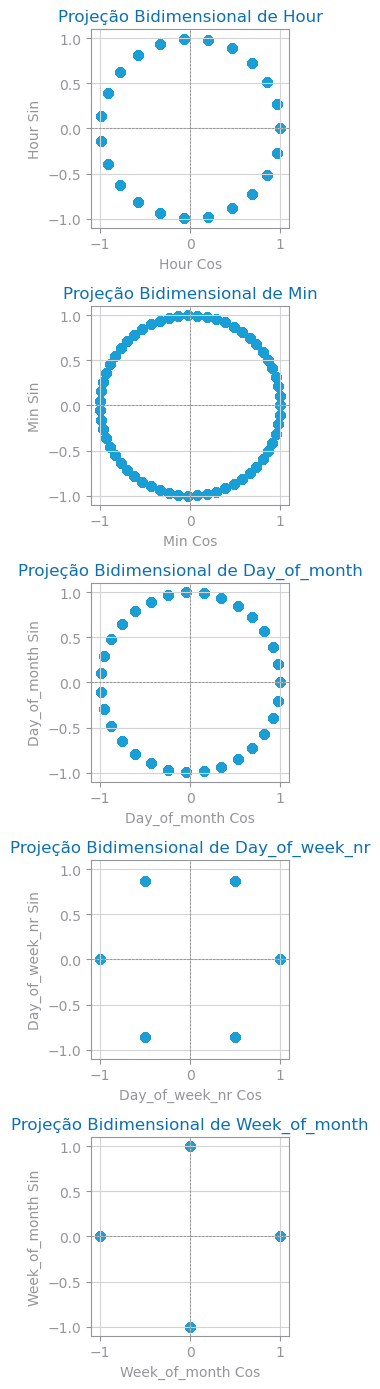

In [22]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month']

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = data_enc[f'{var}_cos']
    y_values = data_enc[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


In [23]:
data_enc.columns

Index(['platform', 'email_provider', 'is_clicked', 'campaign_type',
       'channel_cmp', 'topic', 'total_count', 'subject_length',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos'],
      dtype='object')

In [24]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831549 entries, 0 to 4831548
Data columns (total 28 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   platform                      float64
 1   email_provider                float64
 2   is_clicked                    int64  
 3   campaign_type                 int64  
 4   channel_cmp                   int64  
 5   topic                         float64
 6   total_count                   float64
 7   subject_length                float64
 8   subject_with_personalization  float64
 9   subject_with_deadline         float64
 10  subject_with_emoji            float64
 11  subject_with_bonuses          float64
 12  subject_with_discount         float64
 13  subject_with_saleout          float64
 14  day_of_year                   int64  
 15  is_weekend                    int64  
 16  month                         int64  
 17  time_of_day                   object 
 18  hour_sin              

# Validate float variables

fazer script em que valido quais são float dentro de cada coluna, e quais nao sao. 
se nao forem float, ver os valores la dentro que nao sao int, e eliminar esses. 

In [25]:
print("DataFrame original:")
print(data_enc)

# Função para validar, listar e remover valores que não são float, preservando os NaNs existentes e exibindo valores únicos
def remove_non_float_records_and_convert(data: pd.DataFrame) -> pd.DataFrame:
    rows_to_remove = set()  # Usar um conjunto para armazenar as linhas a serem removidas
    values_removed = {}  # Dicionário para armazenar os valores removidos por coluna

    for col in data.columns:
        # Detectar valores não numéricos, excluindo os NaNs existentes
        mask_non_float = ~pd.to_numeric(data[col], errors='coerce').notna() & data[col].notna()
        non_float_values = data[col][mask_non_float].unique()  # Pegando apenas os valores únicos

        # Verificar se existem valores não numéricos e exibi-los
        if len(non_float_values) > 0:
            values_removed[col] = non_float_values.tolist()
            print(f"Valores não numéricos distintos removidos na variável '{col}': {values_removed[col]}")

            # Adicionar os índices das linhas que contêm esses valores ao conjunto de remoção
            rows_to_remove.update(data.index[mask_non_float].tolist())

    # Remover as linhas que possuem valores não numéricos
    data = data.drop(index=rows_to_remove).reset_index(drop=True)

    # Converter as colunas restantes para float, ignorando os NaNs
    for col in data.columns:
        # Tentar converter a coluna para float, se falhar, manter como está
        try:
            data[col] = data[col].astype(float)
        except ValueError:
            pass  # Se não conseguir converter, não faz nada

    return data

# Aplicar a função no seu DataFrame chamado data_enc
cleaned_data_enc = remove_non_float_records_and_convert(data_enc)

print("\nDataFrame após limpeza e conversão:")
print(cleaned_data_enc)

DataFrame original:
         platform  email_provider  is_clicked  campaign_type  channel_cmp  \
0             NaN             0.0           0              1            1   
1             NaN             1.0           0              1            1   
2             NaN             1.0           0              1            1   
3             NaN             1.0           0              1            1   
4             NaN             2.0           0              1            1   
...           ...             ...         ...            ...          ...   
4831544       NaN             1.0           0              1            1   
4831545       NaN             1.0           0              1            1   
4831546       NaN             1.0           0              1            1   
4831547       NaN             1.0           0              1            1   
4831548       NaN             1.0           0              1            1   

         topic  total_count  subject_length  subject_wi

In [26]:
cleaned_data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619611 entries, 0 to 4619610
Data columns (total 28 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   platform                      float64
 1   email_provider                float64
 2   is_clicked                    float64
 3   campaign_type                 float64
 4   channel_cmp                   float64
 5   topic                         float64
 6   total_count                   float64
 7   subject_length                float64
 8   subject_with_personalization  float64
 9   subject_with_deadline         float64
 10  subject_with_emoji            float64
 11  subject_with_bonuses          float64
 12  subject_with_discount         float64
 13  subject_with_saleout          float64
 14  day_of_year                   float64
 15  is_weekend                    float64
 16  month                         float64
 17  time_of_day                   float64
 18  hour_sin              

# Correlation analysis
Before doing this, convert all symbolic variables into numeric ones, and then compute corr matrix.
(See how in Variable Encoding Lab) 

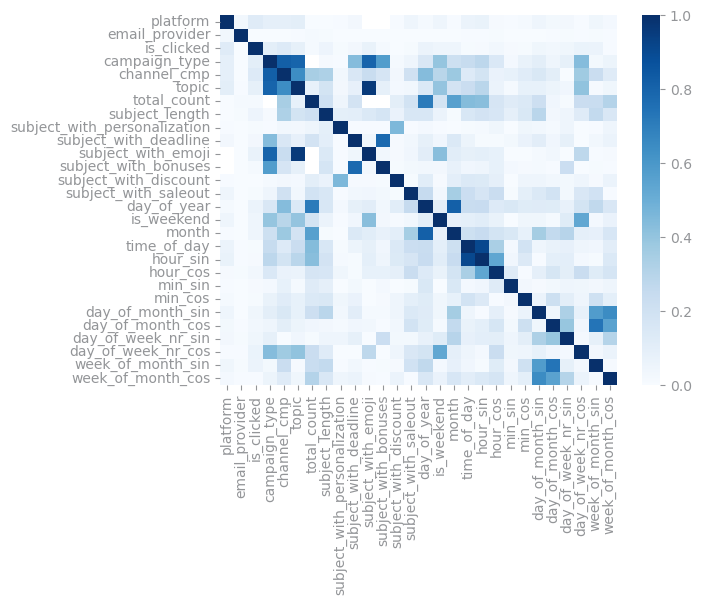

In [28]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show
#from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(cleaned_data_enc)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = cleaned_data_enc.corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=cleaned_data_enc.columns,
    yticklabels=cleaned_data_enc.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"./{file_tag}_correlation_analysis.png")
show()

# Save df from preprocessing into a csv file

In [29]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_msg_encoded.csv'

# Salvar o DataFrame em CSV
cleaned_data_enc.to_csv(filepath, index=False)

## Split data between train and test dataset
- split 70/30 and use the most recent records to the test data